In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Este conjunto de dados foi originalmente extraído do SIGA (Banco de Dados do Sistema de Informações de Geração da ANEEL), que contém as informações dos empreendimentos de geração de energia elétrica do parque gerador nacional em diversas fases: desde etapas anteriores à outorga até a revogação.

No link https://www.aneel.gov.br/siga há mais informações sobre o conjunto de dados e o painel do SIGA.

In [2]:
dados_aneel = pd.read_csv('/kaggle/input/renovaveis-operando/renovaveis_operando.csv', sep = ';')
dados_aneel.head()

In [3]:
dados_aneel.shape

Para facilitar a compreensão, alterei o nome de duas variáveis:

In [4]:
dados_aneel.rename(columns={'NumCoordNEmpreendimento': 'Latitude', 'NumCoordEEmpreendimento': 'Longitude'}, inplace = True)
dados_aneel.head()

In [5]:
dados_aneel.info()

Decidi plotar mapas por 'NomFonteCombustivel'

In [6]:
dados_aneel.NomFonteCombustivel.unique()

In [7]:
!pip install geopandas

In [8]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [9]:
!pip install folium

In [10]:
import folium 
from folium.plugins import StripePattern
from folium import Choropleth, Marker
from folium.plugins import MarkerCluster
from folium.plugins import StripePattern

## Testando o plot de mapas

In [11]:
brasil = folium.Map(
    location=[-16.1237611, -59.9219642],    # Coordenadas retiradas do Google Maps
    zoom_start=4
)
brasil

A forma que encontrei para adicionar a longitude e latitude ao mapa foi:
* Separar as fontes em vários Dataframe;


In [12]:
fonte_hidrica = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Potencial hidráulico')]
fonte_hidrica.head()

* Pegar apenas a longitude e latitude das usinas;

In [13]:
fontes = fonte_hidrica[['Latitude', 'Longitude']]
fontes.head()

* Transformar em uma lista;

In [14]:
records = fontes.to_records(index=False)
result = list(records)

In [15]:
#for coor, coord in result:
#    print('{}, {} = \n\n'.format(coor, coord))

* Fiz um 'for' para adicionar as coordenadas ao mapa.

In [16]:
for i, j in result:
    folium.Marker(location=[i, j]).add_to(brasil)

brasil

Observando a distribuição das usinas de potencial hidráulico, elas estão mais concentradas no centro-oeste, sudeste e sul.
E não acompanha a distribuição de rios, como apresenta a imagem:
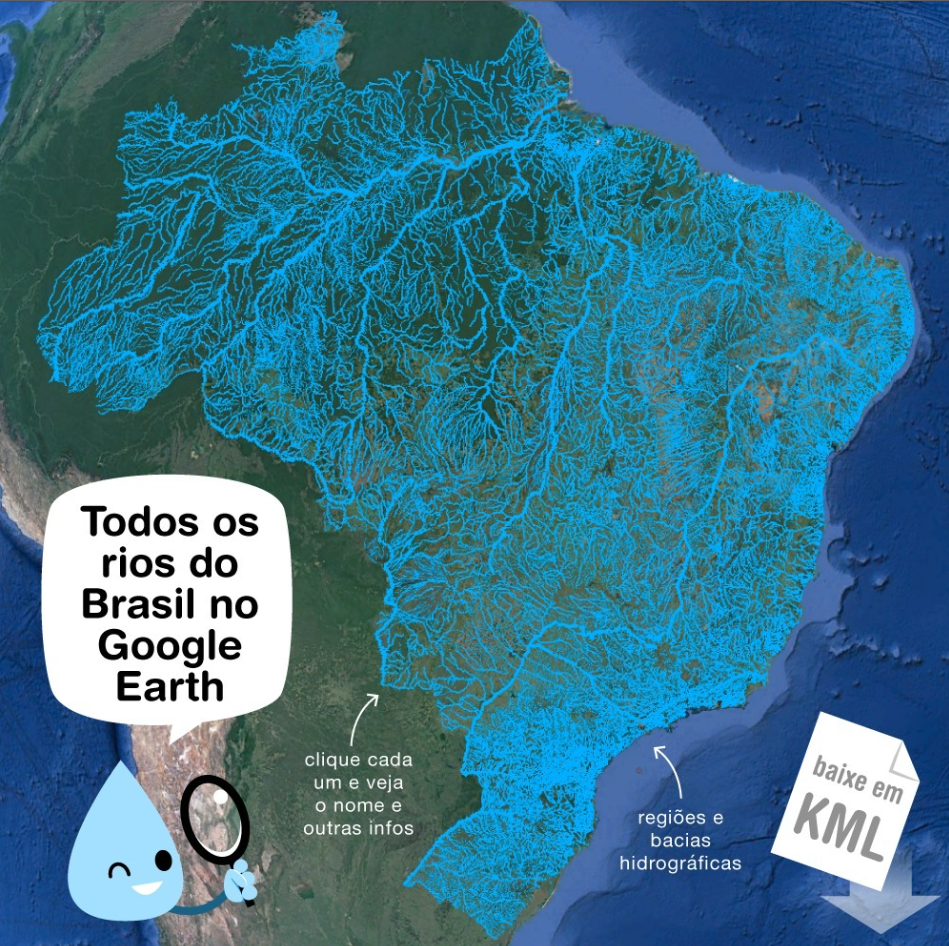

Fonte: https://www.institutodeengenharia.org.br/site/2019/05/29/voce-sabia-todos-os-rios-do-brasil-estao-no-google-earth/

Pois apesar da grande quantidade de rios no país, a construção de uma usina hidrelétrica não é um processo simples. Segundo a Nota técnica da EPE (2018), antes de iniciar sua construção, são necessários estudos de engenharia (em azul) e estudos socioambientais (em verde). 

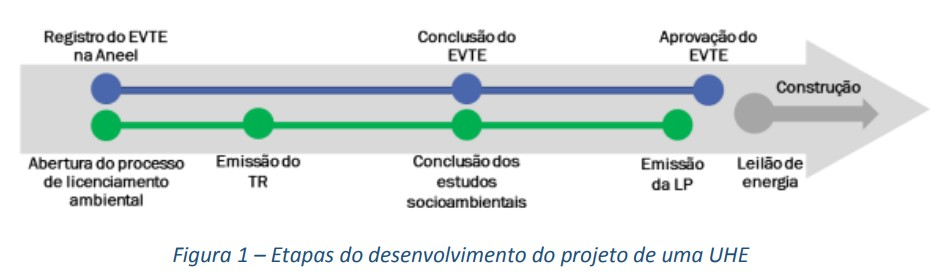

O Estudo de Viabilidade Técnica e Econômica (EVTE) dimensiona o projeto da hidrelétrica e avalia sua viabilidade técnica e econômica, em que são dimensionados o tamanho do reservatório e das estruturas necessárias para a construção da usina. Após sua conclusão e entrega, o EVTE é considerado ‘aceito’ pela Aneel, mas sua aprovação depende da entrega dos estudos socioambientais, LP e DRDH (Declaração de Reserva de Disponibilidade Hídrica) ou documento equivalente. A Nota Técnica analisou o tempo transcorrido, entre o registro até a aprovação, de 28 projetos registrados na Aneel, de 1997 à 2013, o prazo médio do registro até o aceite do EVTE foi de 35 meses (2 anos e 11 meses). Já o prazo médio do registro até a aprovação, foi de 53 meses (4 anos e 5 meses).

A Licença Prévia (LP) é emitida pelo órgão ambiental competente, em que aprova a localização da futura usina e atesta sua viabilidade ambiental. Geralmente, seu processo de elaboração é composto por nove etapas, que abrangem uma vistoria técnica, elaboração de estudos socioambientais, audiências públicas, até a emissão ou indeferimento da LP. Caso a usina provoque interferências à terras indígenas, quilombolas, à bens culturais ou áreas de risco de malária, o órgão licenciador solicita a manifestação de outros órgãos, como a Funai (Fundação Nacional do Índio), FCP (Fundação Cultural Palmares), Iphan (Instituto do Patrimônio Histórico e Artístico Nacional) e o Ministério da Saúde. Ainda segundo a Nota Técnica, a obtenção da LP leva em média 27 meses.

Fonte: https://www.epe.gov.br/sites-pt/publicacoes-dados-abertos/publicacoes/PublicacoesArquivos/publicacao-332/topico-433/NT%20An%C3%A1lise%20Processual%20de%20UHEs%20EPE%20027-2018.pdf

## ***Fonte = Bagaço de cana de açúcar***

In [17]:
brasil2 = folium.Map(
    location=[-16.1237611, -59.9219642], 
    zoom_start=4
)

fonte_bagaco_de_cana = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Bagaço de Cana de Açúcar')]

fontes = fonte_bagaco_de_cana[['Latitude', 'Longitude']]

coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)

for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude],
                 icon=folium.Icon(color='red')
                 ).add_to(brasil2)

brasil2

## ***Fonte = Licor negro***

In [18]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Licor Negro')] # Criando o dataframe de cada fonte
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)                                     # Transformando as coordenadas em uma lista
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:                                               # Adicionando as coordenadas ao mapa
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='black')).add_to(brasil)
brasil

## Fonte = Resíduos Florestais

In [19]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [20]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Resíduos Florestais')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='green')).add_to(brasil)
brasil

## Fonte = Biogás - RU

In [21]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [22]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Biogás - RU')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='gray')).add_to(brasil)
brasil

## Fonte = Cinética do vento

In [23]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [24]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Cinética do vento')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='cadetblue')).add_to(brasil)
brasil

No nordeste, a distribuição das usinas eólicas parecem seguir as regiões com maior potencial de geração, segundo o mapa da ABEEólica.

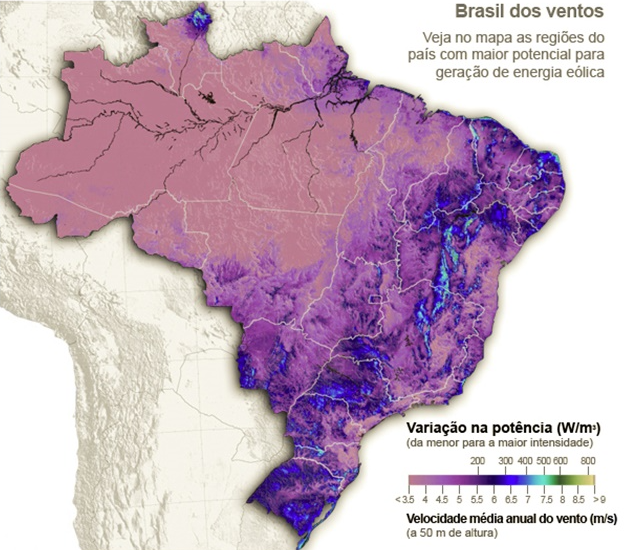

Fonte: https://www.letrasambientais.org.br/posts/nordeste-gera-85-da-energia-eolica-do-brasil

Porém, de acordo com o mapa, acredito ser interessante incentivar a construção de mais usinas eólicas em Minas Gerais, São Paulo e Rio Grande do Sul, já que estes estados apresentam grande potencial de geração eólica.

## Fonte = Lenha

In [25]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [26]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Lenha')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='beige')).add_to(brasil)
brasil

## Fonte = Casca de Arroz

In [27]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [28]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Casca de Arroz')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='lightgray')).add_to(brasil)
brasil

## Fonte = Radiação solar

In [29]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [30]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Radiação solar')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='orange')).add_to(brasil)
brasil

Segundo o Atlas Brasileiro de Energia Solar (2017), no  local  menos  ensolarado  do  Brasil,  é  possível  gerar  mais  eletricidade  solar  do  que  no  local  mais  ensolarado  da  Alemanha. Os próximos mapas apresentam o potencial de geração solar em todo o território nacional, a primeira com um panorama anual e a segunda um panorama mensal. 

O Atlas também destaque que:

“[...] É importante notar que nos meses de verão, principalmente de dezembro a março, a geração é máxima nos estados do extremo Sul e Sudeste do Brasil e coincide com os máximos de demanda registrados pelo Operador Nacional do Sistema – ONS para  essas regiões. Neste contexto e por sua natureza distribuída, a geração solar fotovoltaica  tem também um grande potencial de contribuição para a redução dos picos de demanda dos sistemas de transmissão do Sistema Interligado Nacional – SIN. Nos próximos anos, com o aumento da penetração da geração solar fotovoltaica por todo o  Brasil, a geração de eletricidade próxima ao ponto de consumo deverá ser reconhecida pelo sistema elétrico como um dos principais atributos desta tecnologia de geração.”

Esta afirmação vale tanto para usinas de grande porte centralizadas e instaladas em  solo, como para a geração fotovoltaica distribuída integrada em telhados e coberturas de  edificações. Na época da publicação deste documento, acreditava-se que com a redução dos custos para adquirir um sistema fotovoltaico, esta fonte seria mais difundida na matriz elétrica nacional.


Fonte: https://cenariossolar.editorabrasilenergia.com.br/wp-content/uploads/sites/8/2020/11/Atlas_Brasileiro_Energia_Solar_2a_Edicao_compressed.pdf

## Fonte = Carvão Vegetal

In [31]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [32]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Carvão Vegetal')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='darkgreen')).add_to(brasil)
brasil

## Fonte = Gás de Alto Forno - Biomassa

In [33]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [34]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Gás de Alto Forno - Biomassa')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='darkred')).add_to(brasil)
brasil

## Fonte = Cinética da água

In [35]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [36]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Cinética da água')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='blue')).add_to(brasil)
brasil

## Fonte = Biogás - RA

In [37]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [38]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Biogás - RA')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='purple')).add_to(brasil)
brasil

## Fonte = Capim Elefante

In [39]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [40]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Capim Elefante')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='lightgreen')).add_to(brasil)
brasil

## Fonte = Óleos vegetais

In [41]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [42]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Óleos vegetais')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='lightred')).add_to(brasil)
brasil

## Fonte = Biogás - AGR

In [43]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [44]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Biogás-AGR')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='darkred')).add_to(brasil)
brasil

## Fonte = Resíduos Sólidos Urbanos - RU

In [45]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [46]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Resíduos Sólidos Urbanos - RU')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='gray')).add_to(brasil)
brasil

## Fonte = Biogás - Floresta

In [47]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [48]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Biogás - Floresta')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='green')).add_to(brasil)
brasil

## Fonte = Etanol

In [49]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [50]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Etanol')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='darkgreen')).add_to(brasil)
brasil

## Fonte = Carvão - RU

In [51]:
brasil = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=4)

In [52]:
fonte_combustivel = dados_aneel[(dados_aneel['NomFonteCombustivel'] == 'Carvão - RU')]
fontes = fonte_combustivel[['Latitude', 'Longitude']]
coordenadas = fontes.to_records(index=False)
lista_das_coordenadas = list(coordenadas)
for latitude, longitude in lista_das_coordenadas:
    folium.Marker(location=[latitude, longitude], icon=folium.Icon(color='black')).add_to(brasil)
brasil